**This project was done in Google Colab, a web IDE for python. So, first you need to mount the google drive to access the files in it.**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Now, import Python Pandas, use Panda's HDFStore class to open the HDF5 file and list down all the datasets and there keys within the file.**

In [9]:
import pandas as pd
with pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5') as data:
    for k in data.keys():
        print('{}: {}'.format(k, ', '.join(data[k].columns)))

/28079001: CO, NO_2, NOx, O_3, PM10, PM25, SO_2
/28079003: CO, NO_2, NOx, O_3, PM10, SO_2
/28079004: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079006: BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PM25, PXY, SO_2, TCH, TOL
/28079007: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/28079008: BEN, CH4, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/28079009: CO, NO_2, NOx, O_3, PM10, SO_2
/28079011: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/28079012: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/28079014: CO, NO_2, NOx, O_3, PM10, SO_2
/28079015: BEN, CO, EBE, NMHC, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/28079016: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079017: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079018: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/28079019: CO, NO_2, NOx, O_3, PM10, SO_2
/28079021: CO, NO_2, NOx, O_3, PM10, SO_2
/28079022: BEN, CO, NO_2, NOx, O_3, PM10, PM25, SO_2, TOL
/28079023: BEN, CO, EBE, NMHC, NO_2, NOx, O_3, PM1

**After listing all the datasets and their datasets, lets access one of the datasets in it by using its key. You can choose any key from above.**

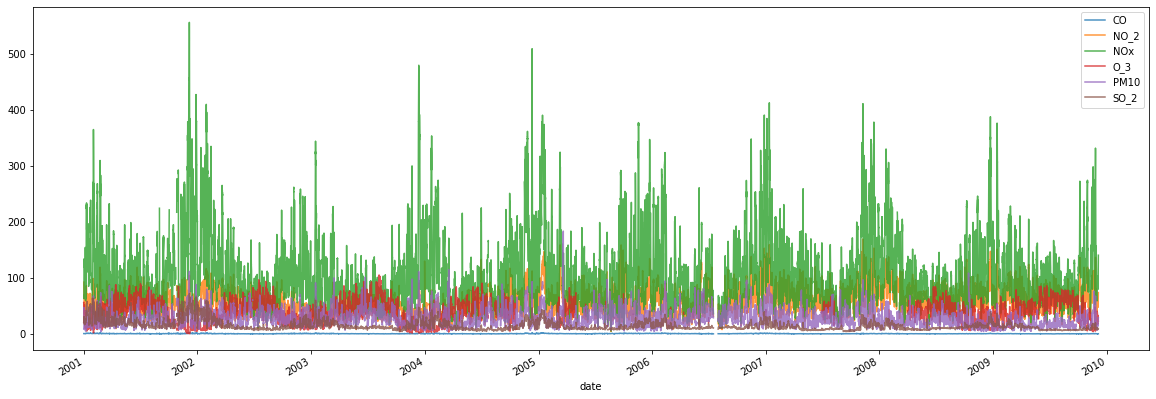

In [10]:
import pandas as pd
with pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5') as data:
    test = data['28079021']

test.rolling(window=24).mean().plot(figsize=(20, 7), alpha=0.8)

**Now, lets try to create a group and subgroup and put some datasets in them, since HDF stores data in hierachy.**

In [11]:
import pandas as pd

# Open the HDF5 file
store = pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5')

# Get a list of the existing datasets in the HDF5 file
datasets = store.keys()

# Create a group in the HDF5 file
store.put('group1', pd.DataFrame(), format='table', data_columns=True)

# Move the existing datasets into the group
for dataset in datasets:
    df = store.get(dataset)
    store.put('group1/' + dataset, df, format='table', data_columns=True)
    store.remove(dataset)

# Create a subgroup within the group
store.put('group1/subgroup1', pd.DataFrame(), format='table', data_columns=True)

# Move some of the datasets from the group into the subgroup
datasets_to_move = ['group1/master', 'group1/28079099']
for dataset in datasets_to_move:
    df = store.get(dataset)
    store.put('group1/subgroup1/' + dataset.split('/')[-1], df, format='table', data_columns=True)
    store.remove(dataset)

# Close the HDF5 file
store.close()

/usr/local/lib/python3.8/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '28079001'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/usr/local/lib/python3.8/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '28079003'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/usr/local/lib/python3.8/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '28079004'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_nam

**Let's try to displays the datasets keys again in the file after creating a group and a subgroup.**

In [12]:
with pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5') as data:
    for k in data.keys():
        print('{}: {}'.format(k, ', '.join(data[k].columns)))

/group1/28079001: CO, NO_2, NOx, O_3, PM10, PM25, SO_2
/group1/28079003: CO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079004: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079006: BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PM25, PXY, SO_2, TCH, TOL
/group1/28079007: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/group1/28079008: BEN, CH4, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/group1/28079009: CO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079011: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/group1/28079012: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/group1/28079014: CO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079015: BEN, CO, EBE, NMHC, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/group1/28079016: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079017: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079018: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/group1/28079019: CO, NO_2, NOx, O_3, PM10, SO_2
/group1/28079021: CO, NO_2, NOx, O_3, PM10, S

**By using HDFStore class, we can access specific datasets in the hierachy and put the datasets in pandas datagrame for data manipulation and visualizations.**

In [13]:
with pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5') as data:
    df = data['group1/subgroup1/master']
df.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [14]:
with pd.HDFStore('/content/drive/My Drive/HDF5/madrid.h5') as data:
    df2 = data['group1/28079039']
df2.head()

,CO,NO,NO_2,NOx,O_3,PM10,SO_2
date,,,,,,,
2001-08-01 01:00:00,0.39,NaN,22.830000,24.799999,66.309998,75.180000,8.80
2001-08-01 02:00:00,0.30,NaN,18.850000,20.230000,68.120003,58.770000,8.97
2001-08-01 03:00:00,0.28,NaN,27.070000,28.850000,60.529999,56.599998,9.13
2001-08-01 04:00:00,0.25,NaN,19.889999,21.309999,70.750000,45.130001,8.58
2001-08-01 05:00:00,0.26,NaN,18.280001,19.520000,72.279999,40.680000,8.64


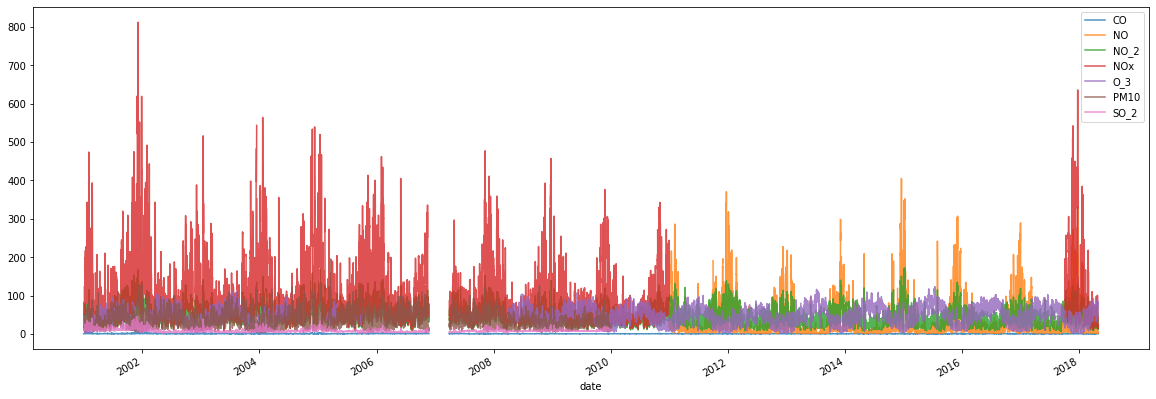

In [15]:
df2.rolling(window=24).mean().plot(figsize=(20, 7), alpha=0.8)